In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolkit import filepath_to_csv, Orchids_filepath_to_csv

In [98]:
filepaths = [
    "round-2-island-data-bottle\prices_round_2_day_-1.csv",
    "round-2-island-data-bottle\prices_round_2_day_0.csv",
    "round-2-island-data-bottle\prices_round_2_day_1.csv",
]

dfs = []
for filepath in filepaths:
    df = Orchids_filepath_to_csv(filepath)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['total_time'] = (df['DAY'] + 1)* 1000000 + df['timestamp']
df['tariff_signal'] = df['EXPORT_TARIFF'].apply(lambda x: 1 if x > 6 else 0)
#df.drop(['timestamp'], axis=1, inplace=True)

humidity_rate = lambda x: 1 - (2/5) * (0.6-x) if x < 0.6 else ((1 - (2/5) * (x-0.8)) if x > 0.8 else 1)
df['Production_rate_humidity'] = (df.HUMIDITY / 100).apply(humidity_rate)

df['true_sunlight'] = df['Production_rate_humidity'] * df['SUNLIGHT']

In [135]:
def graph_values(df, column_name):
    # Assuming df is your DataFrame
    fig, ax = plt.subplots()  # Create a single plot

    # Plot ORCHIDS on primary y-axis (left)
    ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
    ax.set_ylabel('ORCHID Values')

    # Right-hand y-axis ticks (for SUNLIGHT)
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
    right_spine = ax2.spines['right']
    right_spine.set_position(('axes', 1.1))  # Adjust right spine position

    # Plot SUNLIGHT on secondary y-axis (right)
    ax2.plot(df['total_time'], df[column_name], color='red', label=column_name)
    ax2.set_ylabel(column_name + ' Values', color='red')

    # Labels and legend
    plt.xlabel('Total Time')
    plt.title(column_name + 'and ORCHIDS vs. Total Time')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.tight_layout()
    plt.show()

def graph_values_avg(df, column_name):
    # Assuming df is your DataFrame
    fig, ax = plt.subplots()  # Create a single plot
    other_name = 'Previous_Average_' + column_name
    # Plot ORCHIDS on primary y-axis (left)   Previous_Average_SUNLIGHT
    ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
    ax.set_ylabel('ORCHID Values')

    # Right-hand y-axis ticks (for SUNLIGHT)
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
    right_spine = ax2.spines['right']
    right_spine.set_position(('axes', 1.1))  # Adjust right spine position

    # Plot SUNLIGHT on secondary y-axis (right)
    ax2.plot(df['total_time'], df[other_name], color='red', label=other_name)
    ax2.plot(df['total_time'], df[column_name], color='green', label=column_name)
    ax2.set_ylabel(column_name + ' Values', color='red')

    # Labels and legend
    plt.xlabel('Total Time')
    plt.title(column_name + ' and ORCHIDS vs. Total Time')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.tight_layout()
    plt.show()

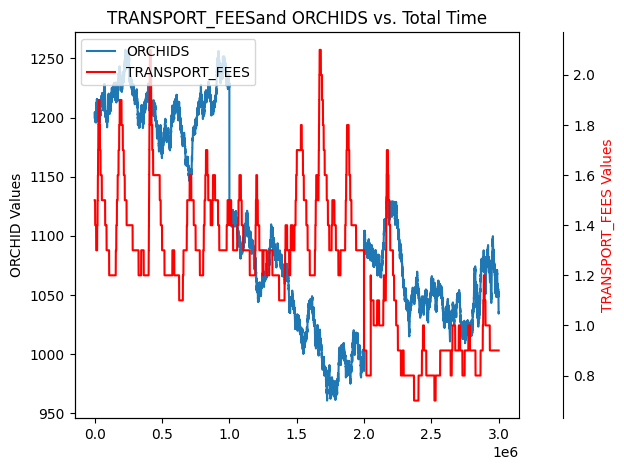

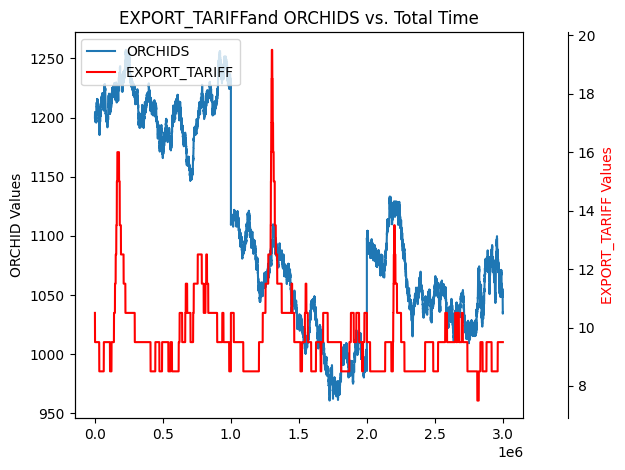

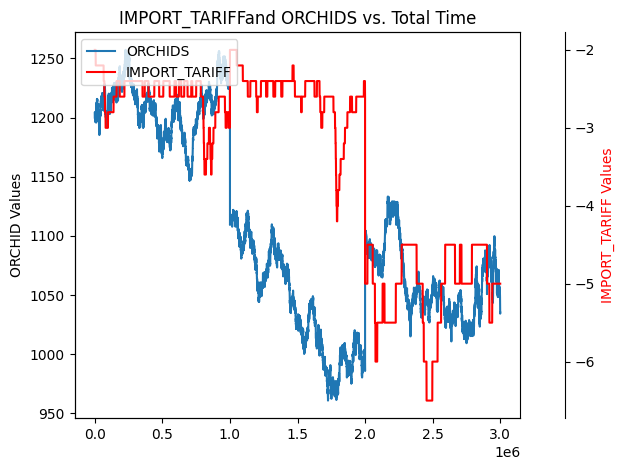

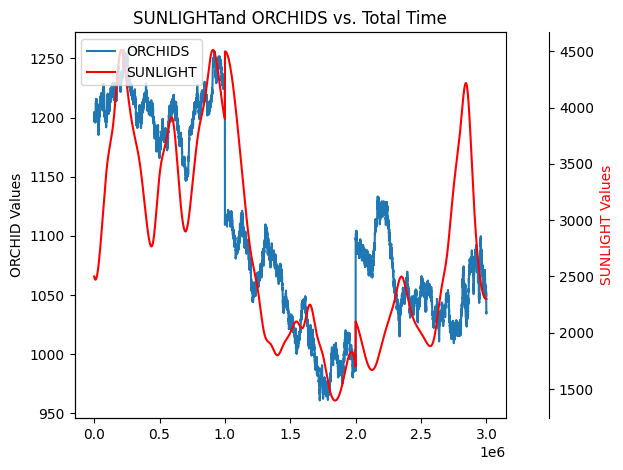

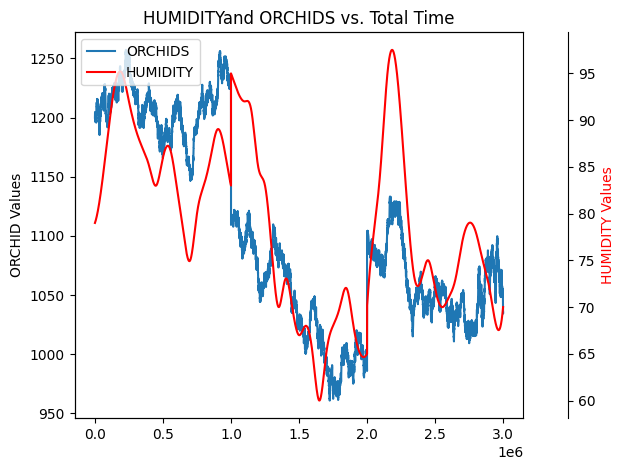

In [100]:
for i in list(df.columns)[2:7]:
    graph_values(df, i)

In [101]:
d1 = df[df.DAY == -1].reset_index()
d2 = df[df.DAY == 0].reset_index()
d3 = df[df.DAY == 1].reset_index()

In [102]:
humidity_rate = lambda x: 1 - (2/5) * (0.6-x) if x < 0.6 else ((1 - (2/5) * (x-0.8)) if x > 0.8 else 1)
df['Production_rate_humidity'] = (df.HUMIDITY / 100).apply(humidity_rate)

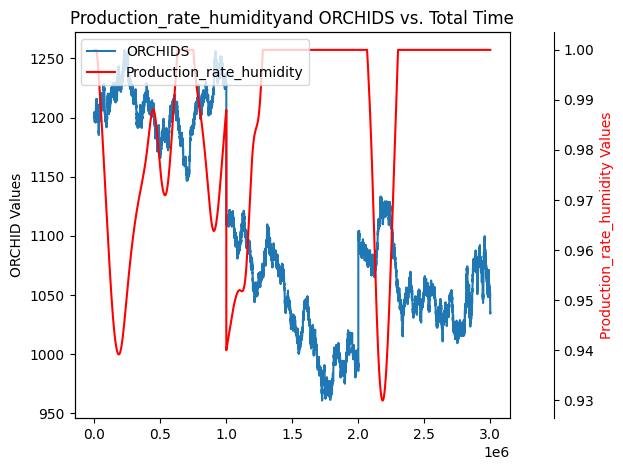

In [103]:
graph_values(df,'Production_rate_humidity')

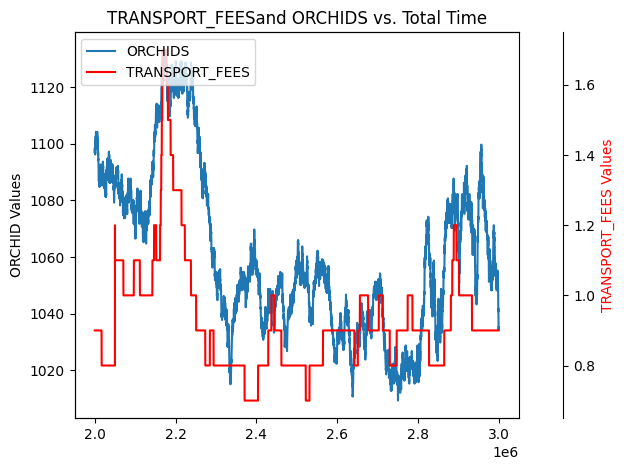

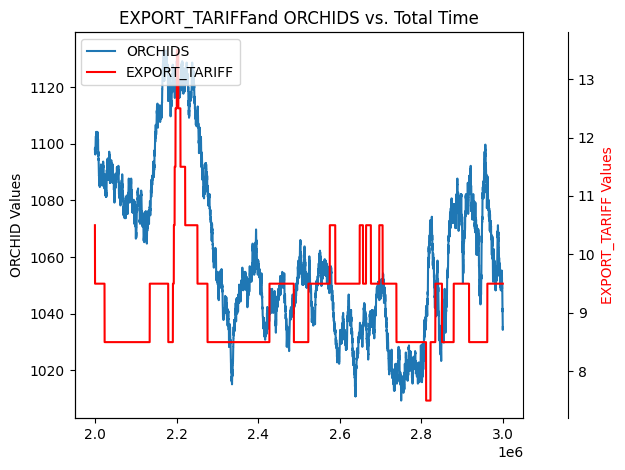

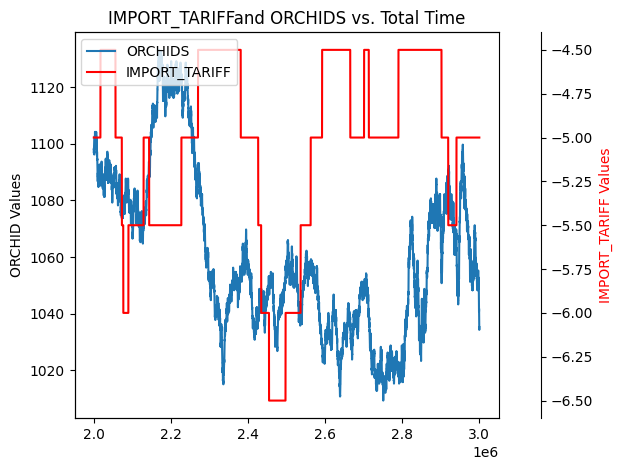

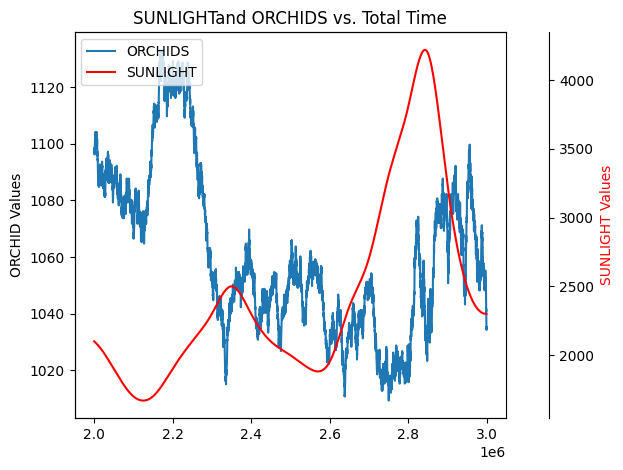

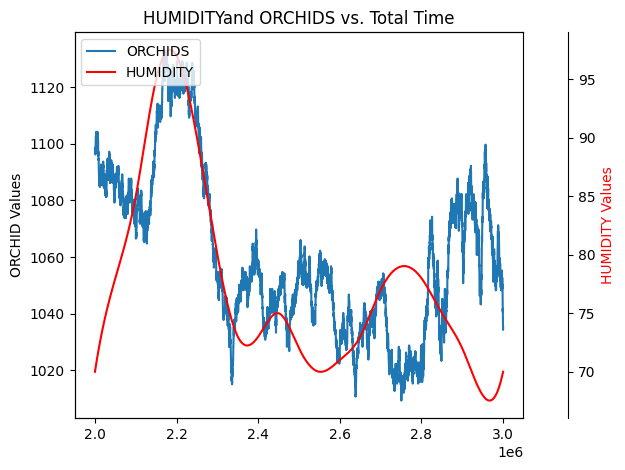

In [104]:
for i in list(d1.columns)[3:8]:
    graph_values(d3, i)

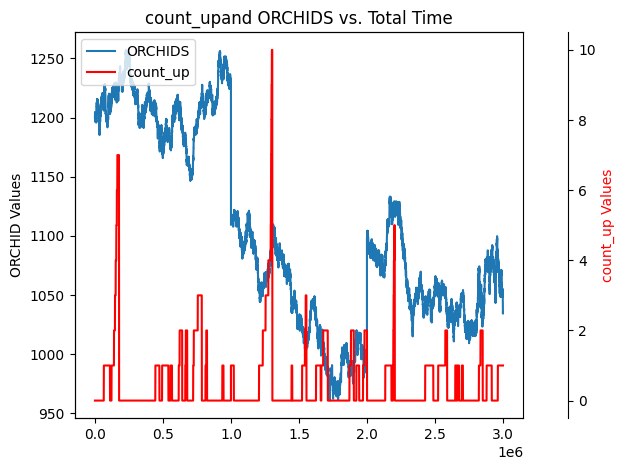

In [105]:
def count_upward_movements(df, col_name):
  """
  This function adds a new column to a DataFrame that counts the number of consecutive upward movements in an existing column.
  The count resets to 0 when a downward movement is encountered.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to analyze.
      col_name (str): The name of the column containing the values to be analyzed.

  Returns:
      pandas.DataFrame: The DataFrame with the new column added.
  """
  df['count_up'] = 0  # Create a new column for the count

  # Iterate through the DataFrame (assuming numerical data in 'col_name')
  for i in range(1, len(df)):
    prev_value = df.loc[i-1, col_name]
    curr_value = df.loc[i, col_name]
    if curr_value > prev_value:
      df.loc[i, 'count_up'] = df.loc[i-1, 'count_up'] + 1
    elif curr_value < prev_value:
      df.loc[i, 'count_up'] = 0
    else:
      df.loc[i, 'count_up'] = df.loc[i-1, 'count_up']

  return df

df_with_counts = count_upward_movements(df.copy(), 'EXPORT_TARIFF')
graph_values(df_with_counts, 'count_up') # either use count up or stop at export tariff == 9

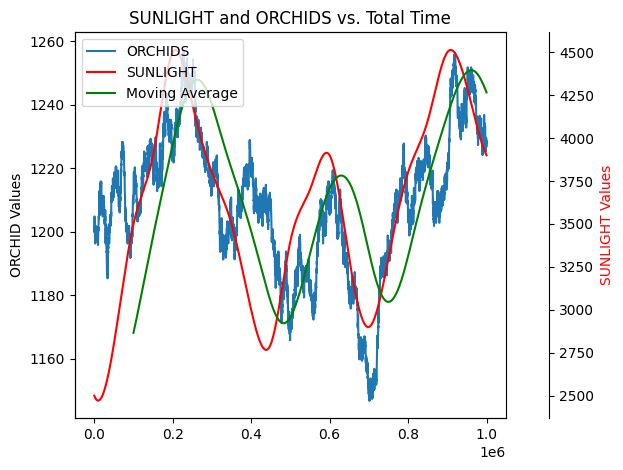

In [106]:
def graph_values_MA(df, column_name):
    # Calculate moving average
    df['Moving_Average'] = df[column_name].rolling(window = 1000).mean()
    
    # Create a single plot
    fig, ax = plt.subplots()  

    # Plot ORCHIDS on primary y-axis (left)
    ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
    ax.set_ylabel('ORCHID Values')

    # Right-hand y-axis ticks (for SUNLIGHT)
    ax2 = ax.twinx()
    ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
    right_spine = ax2.spines['right']
    right_spine.set_position(('axes', 1.1))  # Adjust right spine position

    # Plot SUNLIGHT on secondary y-axis (right)
    ax2.plot(df['total_time'], df[column_name], color='red', label=column_name)
    ax2.set_ylabel(column_name + ' Values', color='red')

    # Plot Moving Average
    ax2.plot(df['total_time'], df['Moving_Average'], color='green', label='Moving Average')
    
    # Labels and legend
    plt.xlabel('Total Time')
    plt.title(column_name + ' and ORCHIDS vs. Total Time')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.tight_layout()
    plt.show()
graph_values_MA(d1, 'SUNLIGHT')

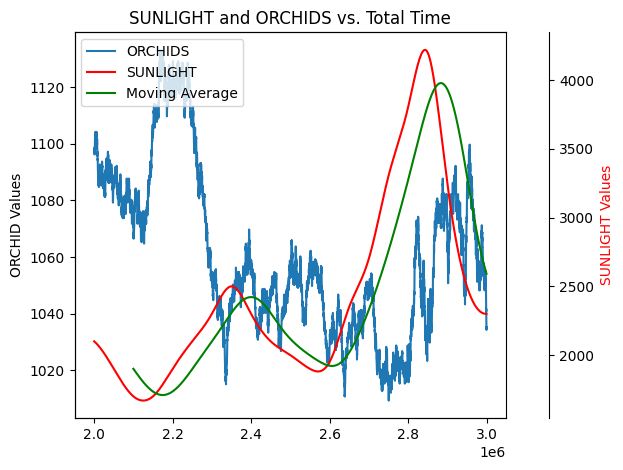

In [107]:
graph_values_MA(d3, 'SUNLIGHT')

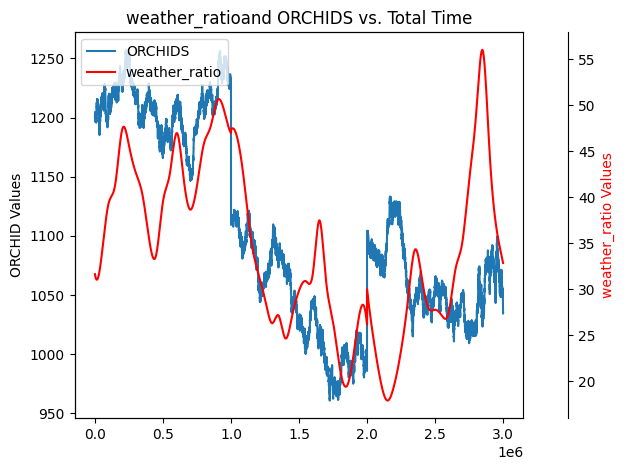

In [108]:
df['weather_ratio'] = (df['SUNLIGHT']/ df['HUMIDITY'])
graph_values(df, 'weather_ratio')

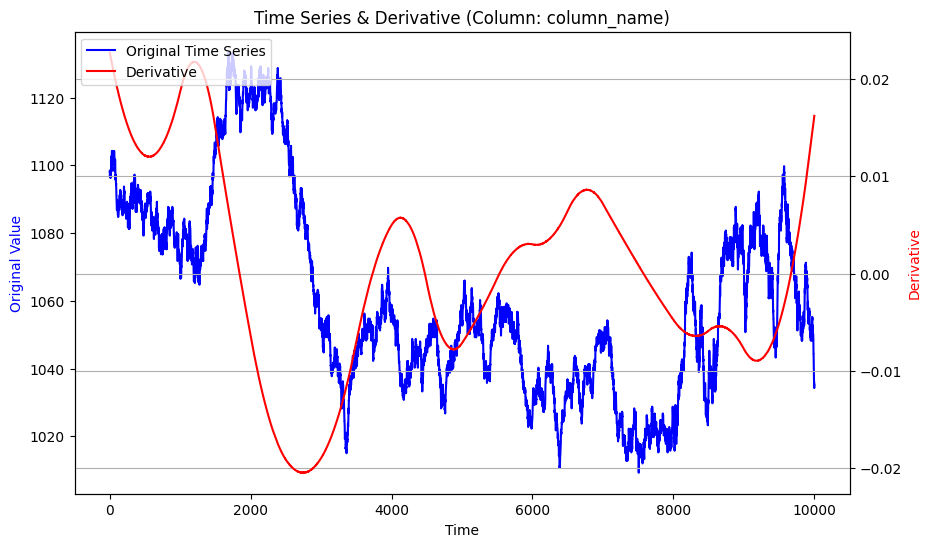

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
data = d3['HUMIDITY']  # Assuming 'column_name' is the time series data

# Calculate the derivative (using numerical differentiation)
derivative = data.diff()  # Difference between consecutive values

fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure with one subplot

# Original time series on primary axis
ax1.plot(d1.index, d3['ORCHIDS'] , label='Original Time Series', color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Original Value', color='b')

# Secondary axis for derivative
ax2 = ax1.twinx()  # Create a secondary axis that shares the x-axis
ax2.plot(d1.index, derivative, label='Derivative', color='r')  # Shift derivative by 1
ax2.set_ylabel('Derivative', color='r')

plt.title('Time Series & Derivative (Column: {})'.format('column_name'))
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.grid(True)
plt.show()


<Axes: >

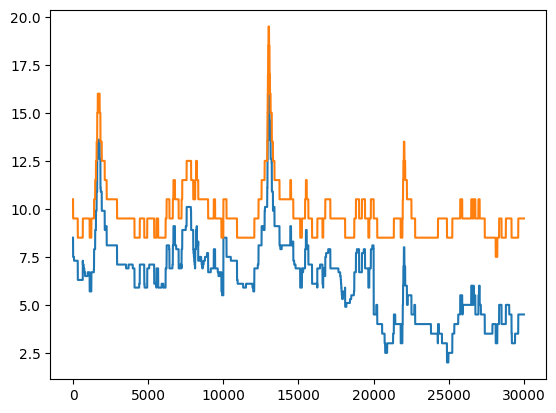

In [110]:
(df.EXPORT_TARIFF + df.IMPORT_TARIFF).plot()
(df.EXPORT_TARIFF).plot()

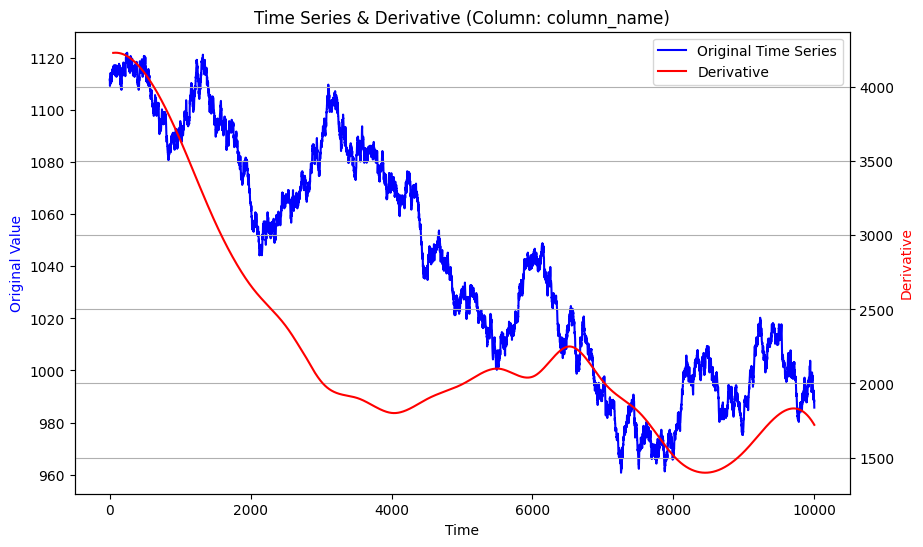

In [137]:
def graph_compare(df, column):
    # Assuming your data is in a pandas DataFrame called 'df'
    data = df[column]  # Assuming 'column_name' is the time series data

    col = data.rolling(window=50).mean()

    fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure with one subplot

    # Original time series on primary axis
    ax1.plot(df.index, df['ORCHIDS'] , label='Original Time Series', color='b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Original Value', color='b')

    ax2 = ax1.twinx()  # Create a secondary axis that shares the x-axis
    ax2.plot(df.index, col, label='Derivative', color='r')  # Shift derivative by 1
    ax2.set_ylabel('Derivative', color='r')

    plt.title('Time Series & Derivative (Column: {})'.format('column_name'))
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.grid(True)
    plt.show()
graph_compare(d2, 'true_sunlight')

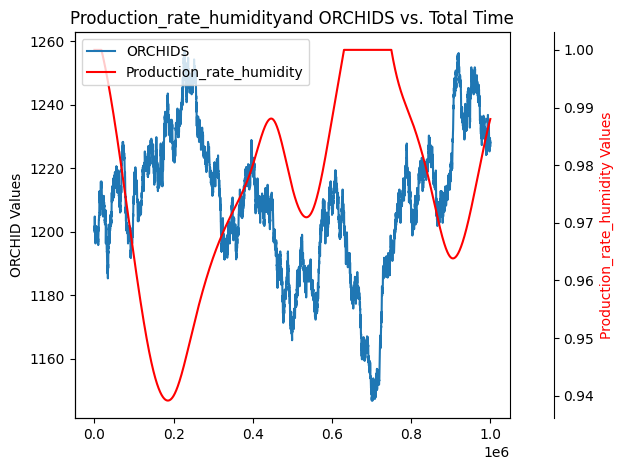

In [112]:
graph_values(d1,'Production_rate_humidity')

In [114]:
def get_averages(d1, name):
    cumulative_sum = d1[name].expanding().sum()
    cumulative_count = d1[name].expanding().count()
    d1['Previous_Average_' + name] = cumulative_sum / cumulative_count

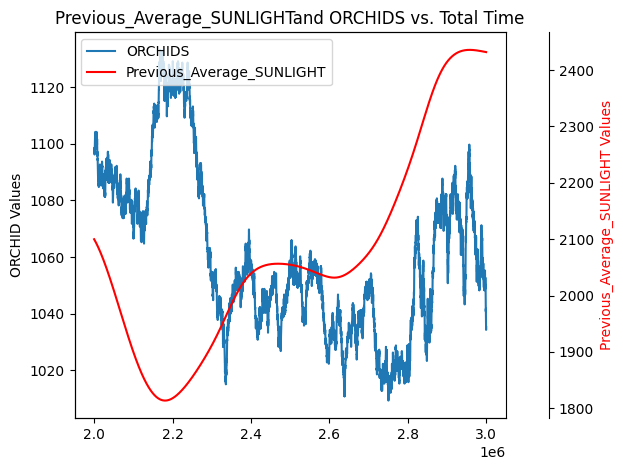

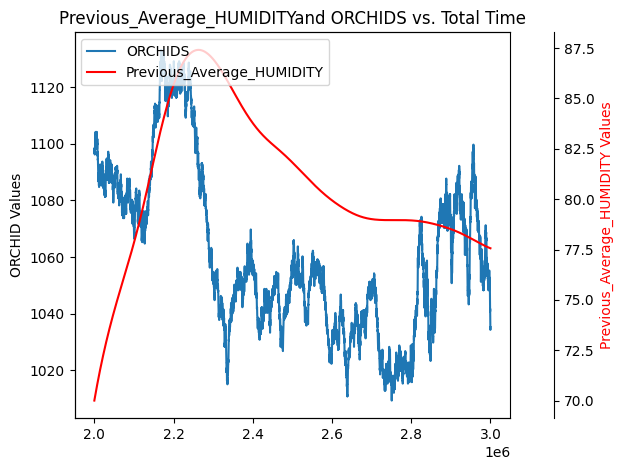

In [128]:
d = d3
get_averages(d, 'SUNLIGHT')
get_averages(d, 'HUMIDITY')

graph_values(d, 'Previous_Average_SUNLIGHT')
graph_values(d, 'Previous_Average_HUMIDITY')

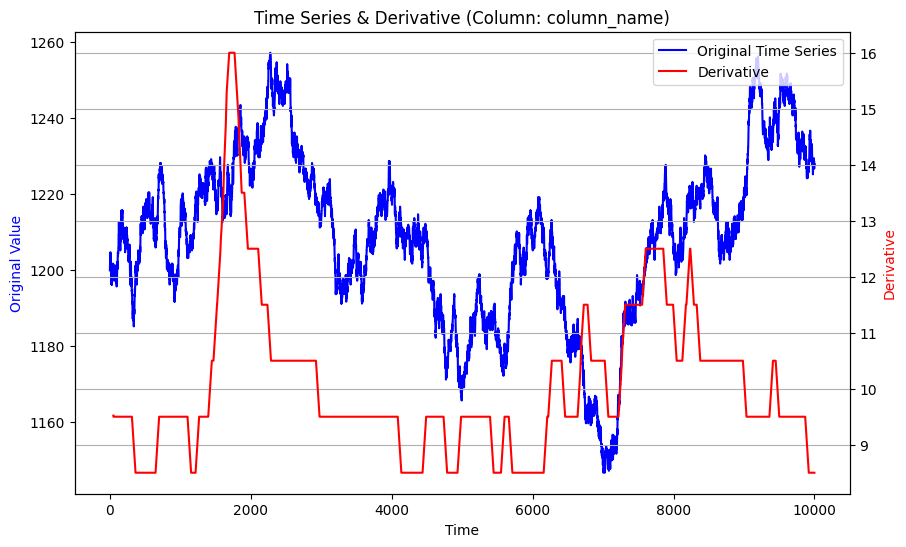

In [138]:
graph_compare(d1, 'EXPORT_TARIFF')

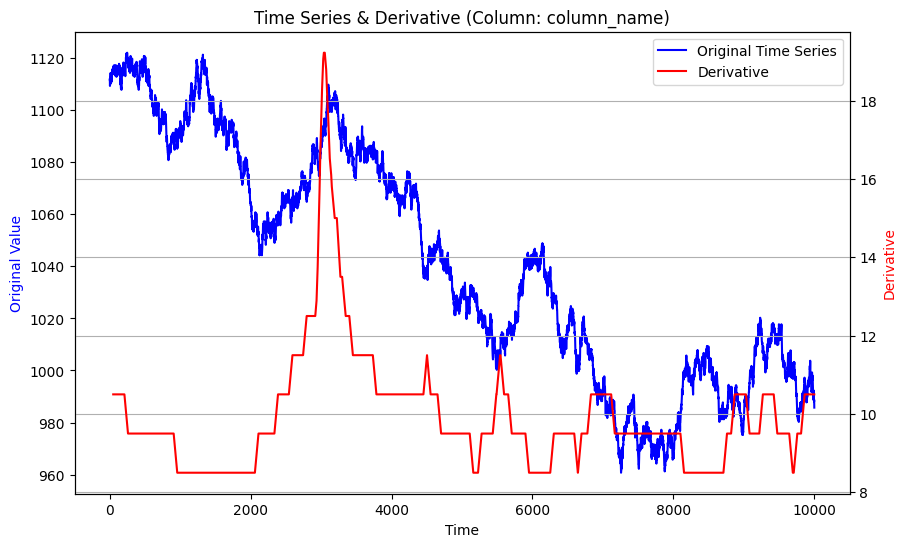

In [139]:
graph_compare(d2, 'EXPORT_TARIFF')

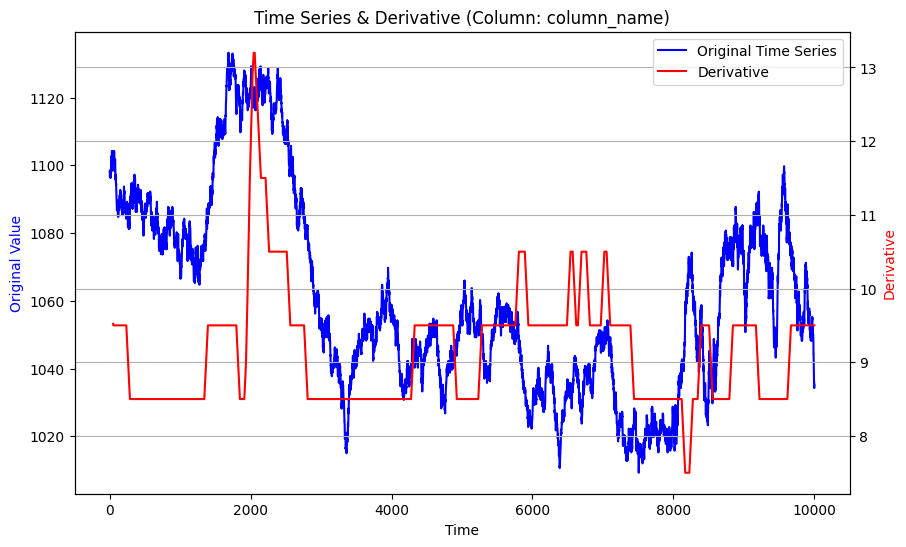

In [140]:
graph_compare(d3, 'EXPORT_TARIFF')